Импорт библиотек

In [24]:
import os
from os import path
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller

3.1 Проверка ряда на стационарность

In [25]:
passengers = pd.read_csv('data/passengers.csv')
passengers['Month'] = pd.to_datetime(passengers['Month'])
df = passengers.set_index('Month').sort_index()

alpha = 0.05
name = "Пассажиры"
ts = df["Passengers"]
print(f'Тест Дики-Фуллера ряда "Пассажиры" :')

dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда "Пассажиры" :
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Значение p больше 5.0%. Ряд не стационарный.


3.2 Удаление тренда, проверка на стационарность

In [26]:
nottrend = []
for i in range(1, len(df["Passengers"])):
   nottrend.append(df["Passengers"][i] - df["Passengers"][i-1])
ts = nottrend

print(f'Тест Дики-Фуллера ряда "Пасажиры без тренда" :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда "Пасажиры без тренда" :
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Значение p больше 5.0%. Ряд не стационарный.


C:\Users\artem\AppData\Local\Temp\ipykernel_13488\3934698305.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nottrend.append(df["Passengers"][i] - df["Passengers"][i-1])


3.3 Удаление сезонности, проверка на стационарность

In [27]:
s = 6
notseason = []
for i in range(s, len(df["Passengers"])):
   notseason.append(df["Passengers"][i] - df["Passengers"][i-s])
ts = notseason

print(f'Тест Дики-Фуллера ряда "Пасажиры без сезонности" :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда "Пасажиры без сезонности" :
Test Statistic                  -3.154446
p-value                          0.022778
#Lags Used                       7.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


C:\Users\artem\AppData\Local\Temp\ipykernel_13488\3317015465.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  notseason.append(df["Passengers"][i] - df["Passengers"][i-s])


3.4-3.6 AR модель и корелляции

Стандартное отклонение = 0.43981953871190294
Среднее = 2.1184418765897033


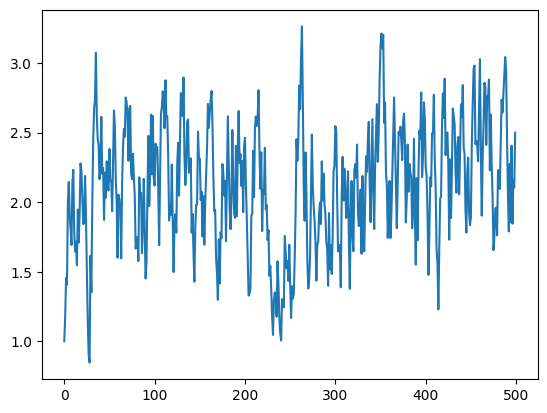

In [28]:
#Исходный случайный ряд

N = 500
ar1 = [1]
for i in range(1, N):
    ar1.append(0.76 * ar1[i-1] + np.random.random())
plt.plot(ar1)
print(f"Стандартное отклонение = {np.std(ar1)}\nСреднее = {np.mean(ar1)}")

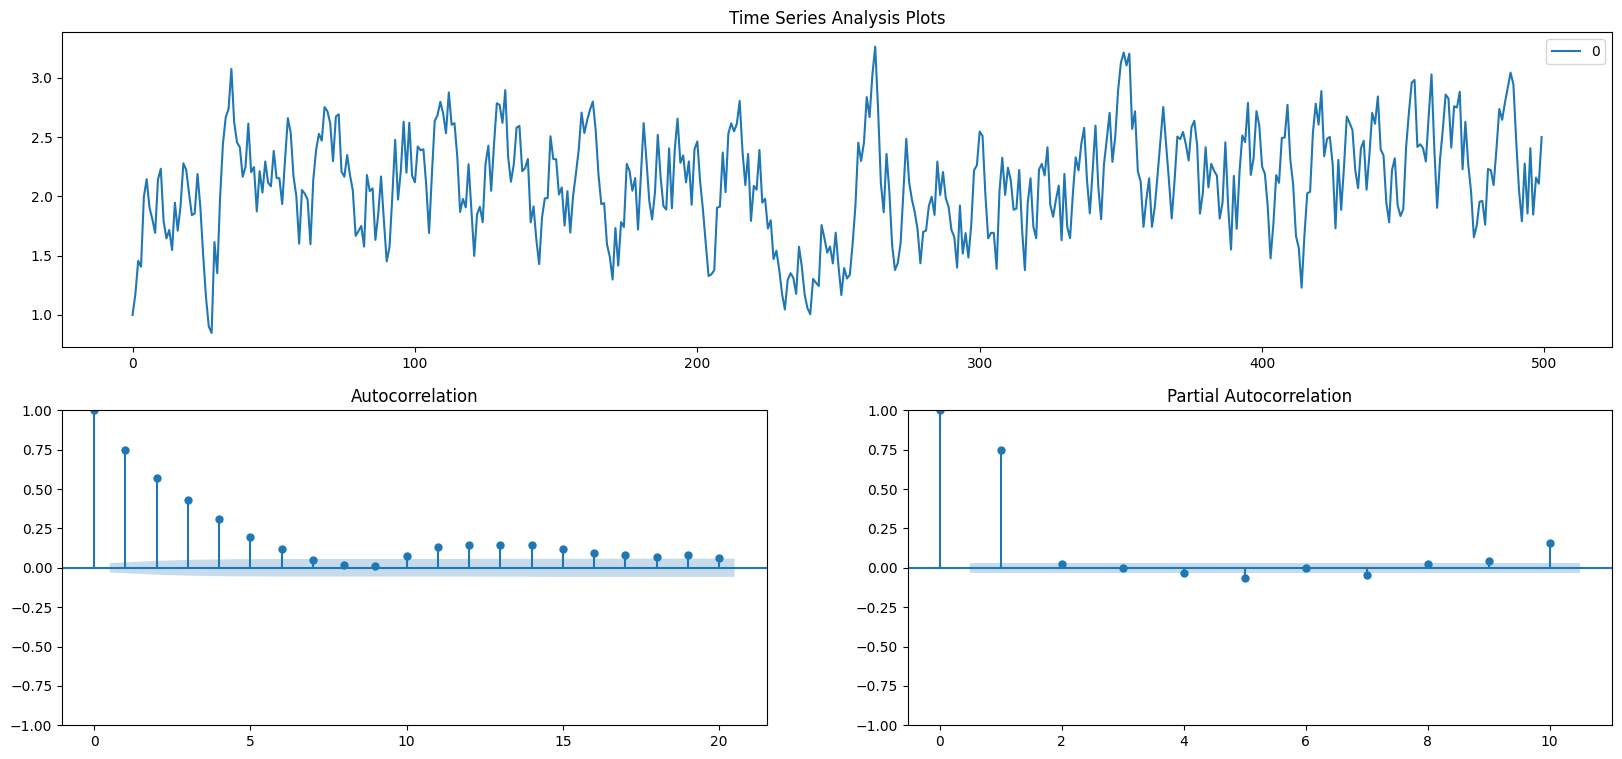

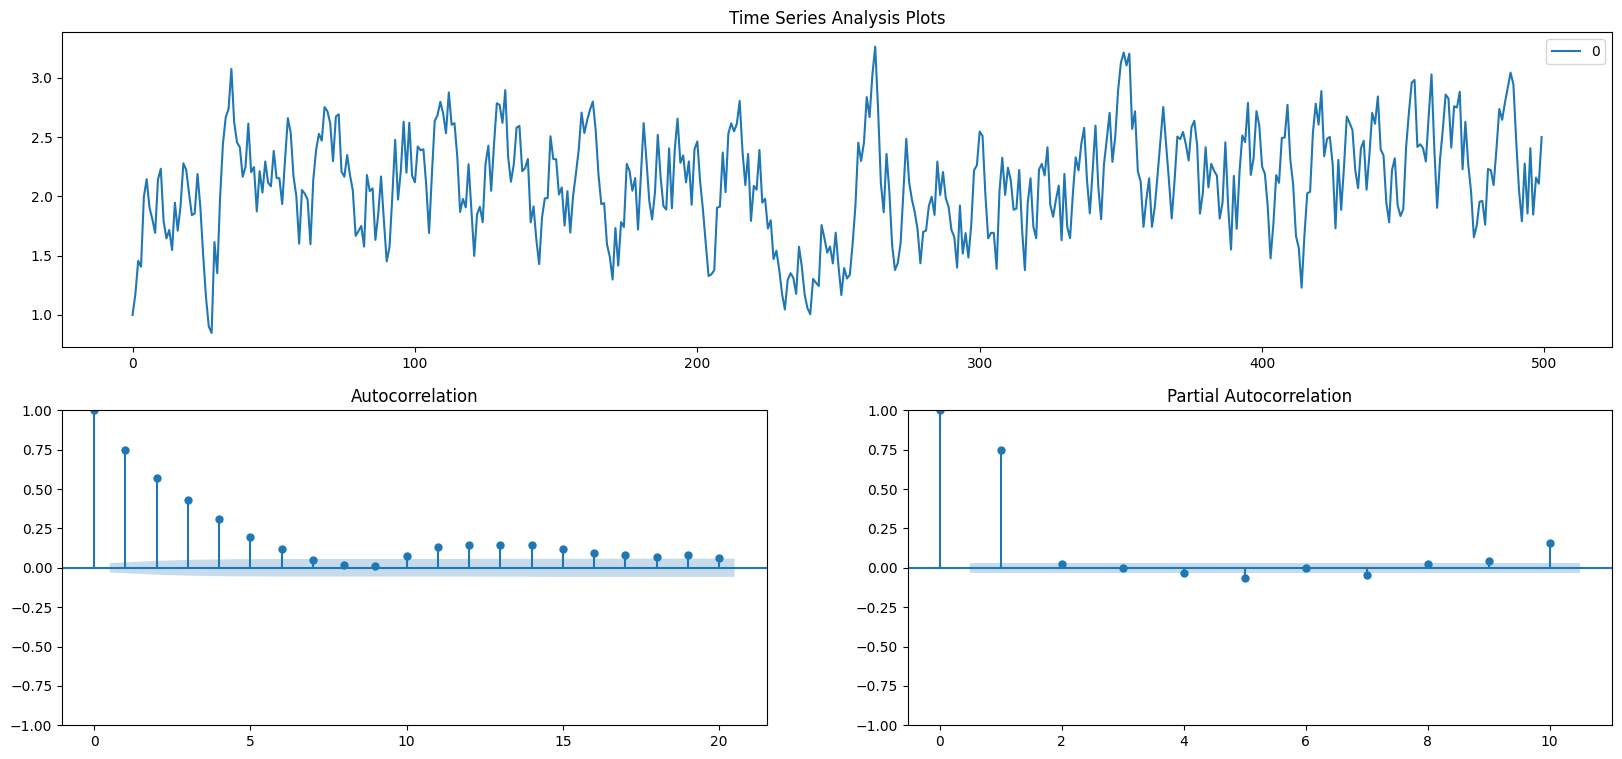

In [29]:
#Обычная и частичная автокорелляция

ts = pd.DataFrame(ar1)

fig = plt.figure(figsize=(20, 9))
layout = (2, 2)
ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))

ts.plot(ax=ts_ax)
ts_ax.set_title('Time Series Analysis Plots')
smt.graphics.plot_acf(ts, lags=20, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(ts, lags=10, ax=pacf_ax, alpha=0.5)

3.7 Оценка метрик (на примере passengers.csv)

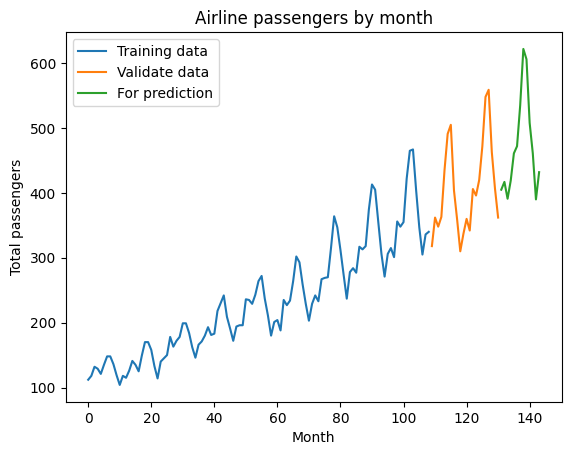

In [30]:
#AR модель, поделённая на выборки

df = pd.read_csv('data/passengers.csv', names=["n","x"], skiprows=1)
df['t'] = df.index.values
ln = len(df)

train_cutoff = int(round(ln*0.75, 0))
validate_cutoff = int(round(ln*0.90,0))

train_df = df[df['t'] <= train_cutoff]
validate_df = df[(df['t'] > train_cutoff) & (df['t'] <= validate_cutoff)]
forecast_df = df[df['t'] > validate_cutoff]

plt.plot(train_df.t, train_df.x, label='Training data')
plt.plot(validate_df.t, validate_df.x, label='Validate data')
plt.plot(forecast_df.t, forecast_df.x, label='For prediction')
plt.legend()
plt.title('Airline passengers by month')
plt.ylabel('Total passengers')
plt.xlabel('Month')
plt.show()

In [31]:
#Объект модели

from statsmodels.tsa.ar_model import AutoReg, ar_select_order
mod = AutoReg(df.t, 3, old_names=False)
res = mod.fit()

print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      t   No. Observations:                  144
Model:                     AutoReg(3)   Log Likelihood                4014.220
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Fri, 24 Nov 2023   AIC                          -8018.440
Time:                        20:13:20   BIC                          -8003.696
Sample:                             3   HQIC                         -8012.448
                                  144                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6667   5.86e-15   1.14e+14      0.000       0.667       0.667
t.L1           1.0000    5.8e-15   1.72e+14      0.000       1.000       1.000
t.L2           0.3333   7.16e-17   4.65e+15      0.0

In [32]:
#Модель с оценкой HC0

res = mod.fit(cov_type="HC0")
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      t   No. Observations:                  144
Model:                     AutoReg(3)   Log Likelihood                4014.220
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Fri, 24 Nov 2023   AIC                          -8018.440
Time:                        20:13:20   BIC                          -8003.696
Sample:                             3   HQIC                         -8012.448
                                  144                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6667   3.86e-15   1.73e+14      0.000       0.667       0.667
t.L1           1.0000   3.79e-15   2.64e+14      0.000       1.000       1.000
t.L2           0.3333    8.5e-17   3.92e+15      0.0

In [33]:
sel = ar_select_order(df.x, 13, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      x   No. Observations:                  144
Model:                    AutoReg(13)   Log Likelihood                -497.994
Method:               Conditional MLE   S.D. of innovations             10.832
Date:                Fri, 24 Nov 2023   AIC                           1025.988
Time:                        20:13:20   BIC                           1069.116
Sample:                            13   HQIC                          1043.513
                                  144                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1490      2.857      1.802      0.072      -0.451      10.749
x.L1           0.7608      0.070     10.885      0.000       0.624       0.898
x.L2          -0.0853      0.069     -1.229      0.2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


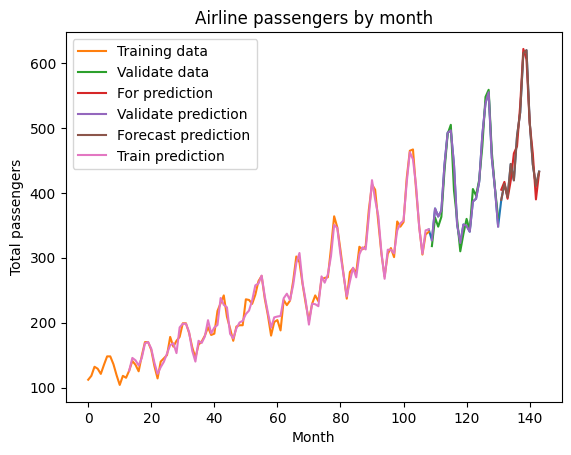

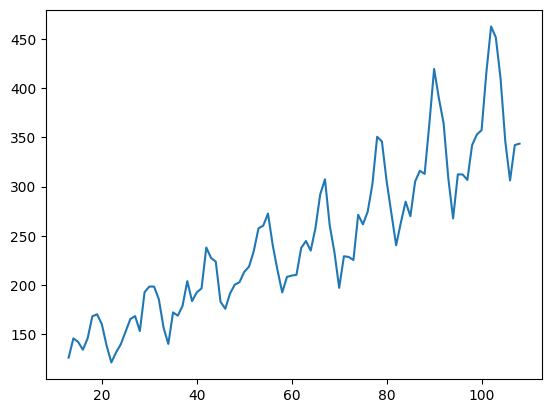

In [34]:
#Предсказание, график
fig = res.plot_predict(train_cutoff)
pred = res.predict(start=0, end=train_cutoff, dynamic=False)
v_pred = res.predict(start=train_cutoff+1, end=(validate_cutoff), dynamic=False)
f_pred = res.predict(start=validate_cutoff + 1, end=(forecast_df.t[len(df.t)-1]), dynamic=False)

plt.plot(train_df.t, train_df.x, label='Training data')
plt.plot(validate_df.t, validate_df.x, label='Validate data')
plt.plot(forecast_df.t, forecast_df.x, label='For prediction')
plt.plot(validate_df.t, v_pred, label='Validate prediction ')
plt.plot(forecast_df.t, f_pred, label='Forecast prediction')
plt.plot(train_df.t, pred, label='Train prediction')

plt.legend()
plt.title('Airline passengers by month')
plt.ylabel('Total passengers')
plt.xlabel('Month')
plt.show()

plt.plot(pred)

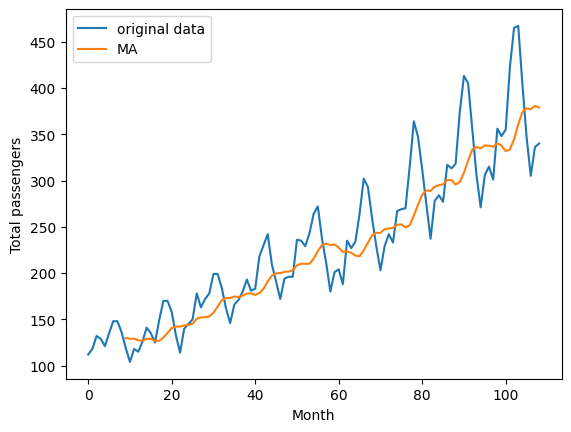

In [35]:
# MA
df['t'] = df.index.values
ln = len(df)
train_cutoff = int(round(ln*0.75, 0))
validate_cutoff = int(round(ln*0.90,0))

train_df = df[df['t'] <= train_cutoff]
validate_df = df[(df['t'] > train_cutoff) & (df['t'] <= validate_cutoff)]
forecast_df = df[df['t'] > validate_cutoff]

plt.plot(train_df["t"], train_df["x"], label="original data")
plt.plot(train_df["t"], train_df["x"].rolling(10).mean(), label="MA")
plt.legend()
plt.ylabel('Total passengers')
plt.xlabel('Month')
plt.show()

In [38]:
#Вывод, метрика
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score

print("RMSE:", np.sqrt(mean_squared_error(forecast_df.x, f_pred)))
print("MAPE:", mean_absolute_percentage_error(forecast_df.x, f_pred))
print("MAE:", mean_absolute_error(forecast_df.x, f_pred))
print("R2: ", r2_score(forecast_df.x, f_pred))

RMSE: 17.5407882480859
MAPE: 0.030039826361233035
MAE: 13.68031491337887
R2:  0.9437821578085054
